In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_burden = pd.read_csv('C:/Users/Woon.Kim/Downloads/CG_in_US_2015_Public_Use_data_files/data.csv')
data_burden = data_burden[data_burden['burden'].notna()]
data_burden = data_burden[data_burden.columns[data_burden.isnull().mean() < 0.2]]

data_burden.columns[data_burden.isnull().any()]

for column in data_burden.columns:
    data_burden[column].fillna(data_burden[column].mode()[0], inplace=True)

median = data_burden.loc[data_burden['agecr'] < 200, 'agecr'].median()
data_burden["agecr"] = np.where(data_burden["agecr"] > 200, median,data_burden['agecr'])

# random forest
from sklearn.ensemble import RandomForestRegressor

x = data_burden.loc[:, data_burden.columns != 'burden']
y = data_burden['burden']

#m = sqrt(p)+1 features
nfeatures = data_burden.shape[1] - 1
model4 = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
model4.fit(x,y)

y_hat = model4.predict(x)

score = model4.score(x, y)

from sklearn.metrics import mean_squared_error
model4_train_rmse = mean_squared_error(y, y_hat, squared=False)

df_feature = pd.DataFrame(zip(x.columns, model4.feature_importances_), columns = ['feature','importance'])
df_feature = df_feature.sort_values(by=['importance'], ascending=False)
#plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])


df_feature[0:29]

,feature,importance
87,burdcat,0.194899
84,hours,0.116115
71,adls,0.111494
85,hourscat,0.101475
86,banhours,0.072848
83,q25,0.070134
65,q22a,0.057458
66,q22b,0.034405
68,q22d,0.027614
88,n3,0.023265


In [3]:
data_burden = data_burden[['q18', 'hours', 'adls', 'q22a', 'q22b', 'q22d', 'n3', 'q22c', 'iadls', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e', 'burden']]

In [4]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0]
data_burden = data_burden.loc[data_burden['q18'].isin(lst)]
data_burden["q18"] = data_burden["q18"].astype(str)
data_burden["q18"] = data_burden["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0"], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones"])
data_burden

,q18,hours,adls,q22a,q22b,q22d,n3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden
3,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
5,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
13,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0
24,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
36,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968,Alzheimer,25.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,4.0
7969,Stroke,90.0,6.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
7970,Arthritis,20.0,0.0,2.0,2.0,2.0,1.0,2.0,6.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0
7971,BrokenBones,40.0,4.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0


In [5]:
lst2 = ['q22a', 'q22b', 'q22d', 'n3', 'q22c', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e']
data_burden[lst2] = data_burden[lst2].astype(object)

In [6]:
data_burden = data_burden[data_burden['q22a'] != 3.0]
data_burden = data_burden[data_burden['q22a'] != 4.0]
data_burden = data_burden[data_burden['q22b'] != 3.0]
data_burden = data_burden[data_burden['q22b'] != 4.0]
data_burden = data_burden[data_burden['q22d'] != 3.0]
data_burden = data_burden[data_burden['q22d'] != 4.0]
data_burden = data_burden[data_burden['n3'] != 3.0]
data_burden = data_burden[data_burden['n3'] != 4.0]
data_burden = data_burden[data_burden['q22c'] != 3.0]
data_burden = data_burden[data_burden['q22c'] != 4.0]
data_burden = data_burden[data_burden['q22g'] != 3.0]
data_burden = data_burden[data_burden['q22g'] != 4.0]
data_burden = data_burden[data_burden['q22f'] != 3.0]
data_burden = data_burden[data_burden['q22f'] != 4.0]
data_burden = data_burden[data_burden['q23d'] != 3.0]
data_burden = data_burden[data_burden['q23d'] != 4.0]
data_burden = data_burden[data_burden['q23c'] != 3.0]
data_burden = data_burden[data_burden['q23c'] != 4.0]
data_burden = data_burden[data_burden['q22e'] != 3.0]
data_burden = data_burden[data_burden['q22e'] != 4.0]
data_burden = data_burden[data_burden['banlives'] != 3.0]

In [7]:
data_burden.head()

,q18,hours,adls,q22a,q22b,q22d,n3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden
3,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
5,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
13,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0
24,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
36,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0


In [8]:
data_burden["q22a"] = data_burden["q22a"].astype(str)
data_burden["q22a"] = data_burden["q22a"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22b"] = data_burden["q22b"].astype(str)
data_burden["q22b"] = data_burden["q22b"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22d"] = data_burden["q22d"].astype(str)
data_burden["q22d"] = data_burden["q22d"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["n3"] = data_burden["n3"].astype(str)
data_burden["n3"] = data_burden["n3"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22c"] = data_burden["q22c"].astype(str)
data_burden["q22c"] = data_burden["q22c"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22g"] = data_burden["q22g"].astype(str)
data_burden["q22g"] = data_burden["q22g"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22f"] = data_burden["q22f"].astype(str)
data_burden["q22f"] = data_burden["q22f"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q23d"] = data_burden["q23d"].astype(str)
data_burden["q23d"] = data_burden["q23d"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q23c"] = data_burden["q23c"].astype(str)
data_burden["q23c"] = data_burden["q23c"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22e"] = data_burden["q22e"].astype(str)
data_burden["q22e"] = data_burden["q22e"].replace(["1.0","2.0"], ["Yes","No"])

data_burden["banlives"] = data_burden["banlives"].astype(str)
data_burden["banlives"] = data_burden["banlives"].replace(["1.0","2.0"], ["Yes","No"])

In [9]:
data_burden.columns = ['illness', 'hours', 'adls', 'help_with_bed', 'help_with_dressed', 'help_with_bathe', 'help_with_med', 'help_with_toilet', 'iadls', 'giving_medicine', 'help_with_feeding', 'preparing_meals', 'live_with_cr', 'help_housework', 'help_with_diapers', 'burden']
data_burden = data_burden.reset_index(drop=True)

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_burden, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Plots

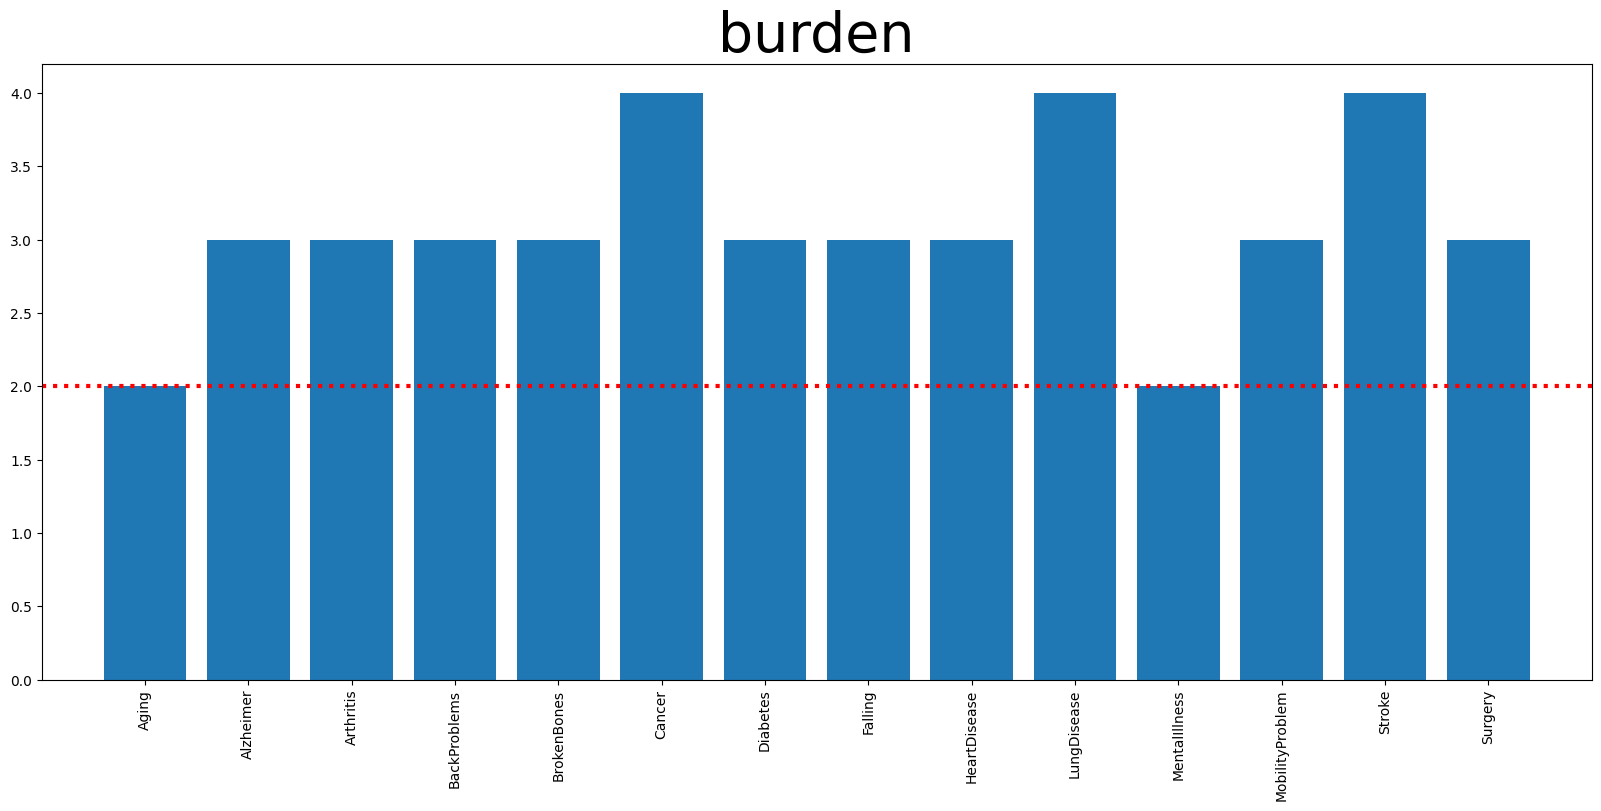

In [11]:
df_1 = data_burden.groupby(['illness'])['burden'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['burden'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['burden'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "burden", fontsize=40)
plt.plot()
plt.show()

In [12]:
data_burden.head()

,illness,hours,adls,help_with_bed,help_with_dressed,help_with_bathe,help_with_med,help_with_toilet,iadls,giving_medicine,help_with_feeding,preparing_meals,live_with_cr,help_housework,help_with_diapers,burden
0,Aging,28.0,0.0,No,No,No,No,No,4.0,No,No,Yes,Yes,Yes,No,3.0
1,MobilityProblem,0.5,4.0,Yes,Yes,No,Yes,No,6.0,Yes,Yes,Yes,No,Yes,Yes,3.0
2,Arthritis,77.0,0.0,No,No,No,Yes,No,5.0,Yes,No,No,No,Yes,No,4.0
3,Cancer,12.0,0.0,No,No,No,No,No,6.0,No,No,Yes,No,Yes,No,2.0
4,Diabetes,21.0,2.0,Yes,No,No,Yes,Yes,7.0,Yes,No,Yes,No,Yes,No,4.0


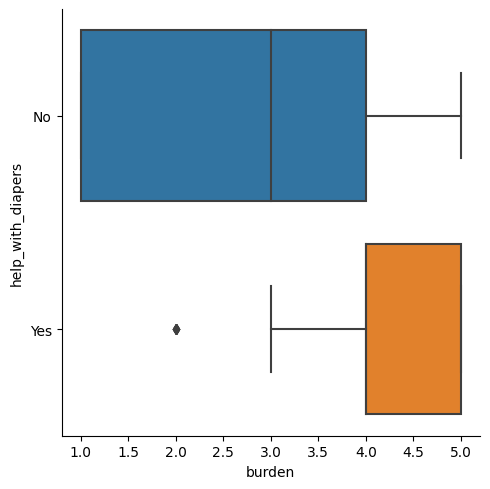

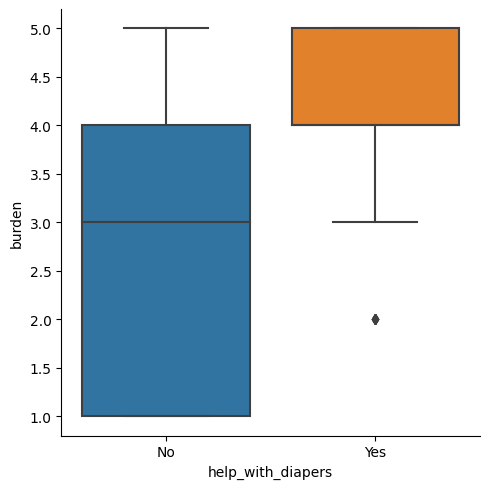

In [28]:
sns.catplot(x="burden", y="help_with_diapers", kind="box", data=data_burden)
sns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_burden)

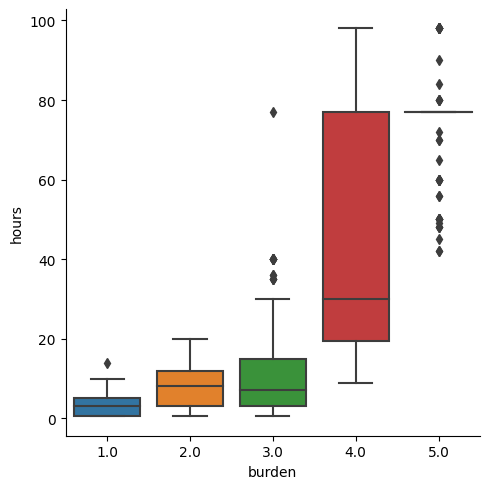

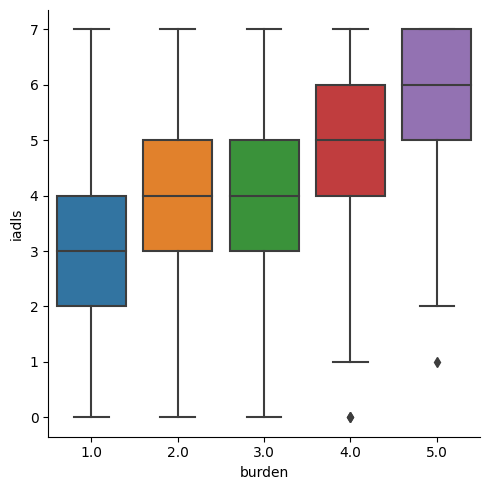

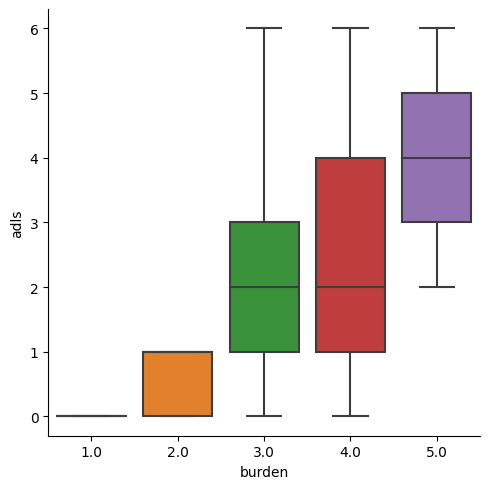

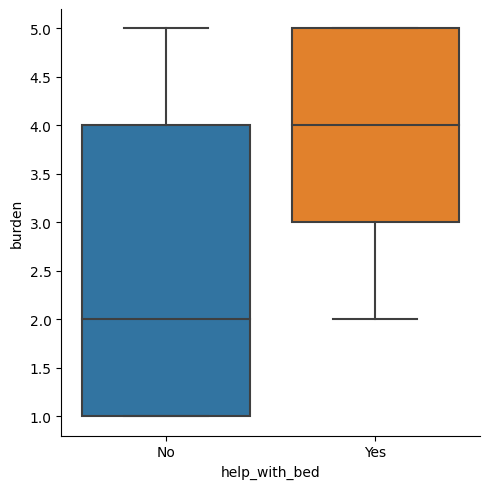

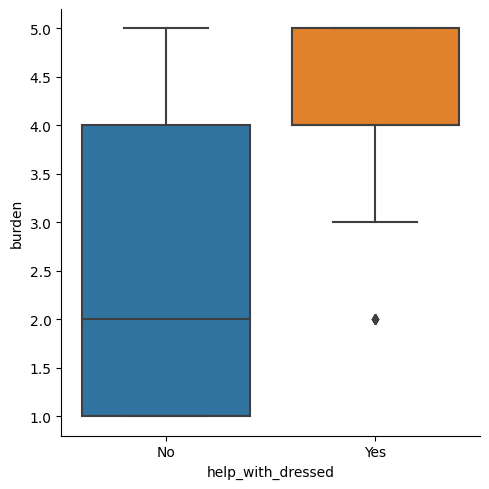

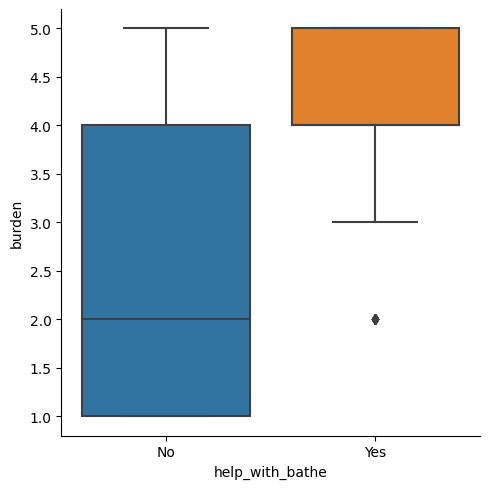

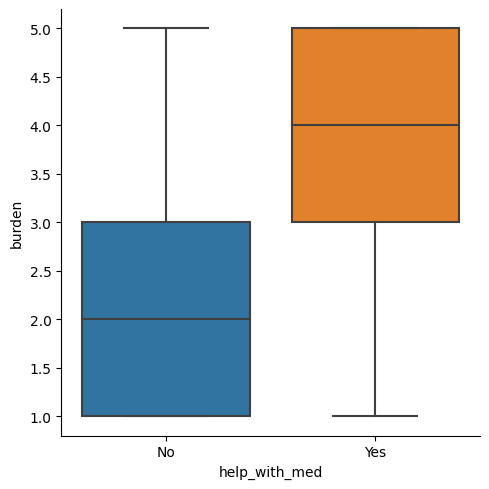

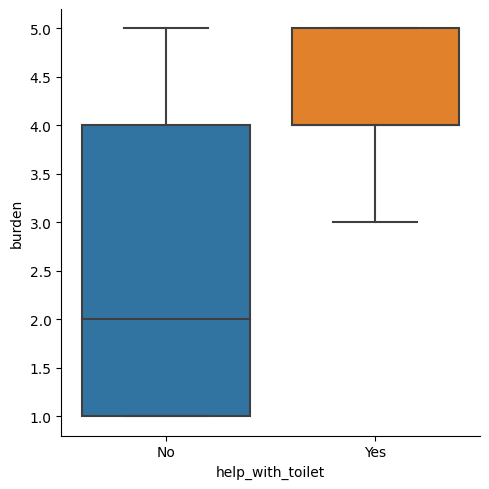

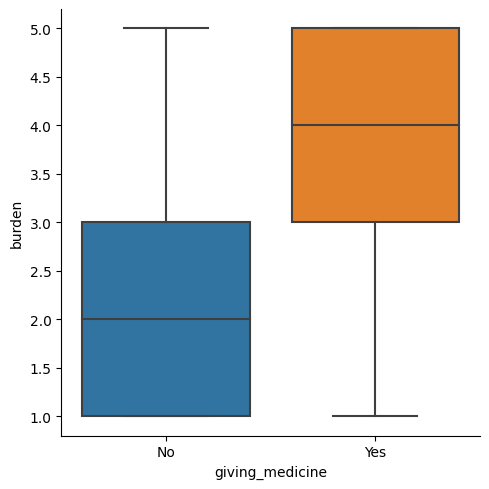

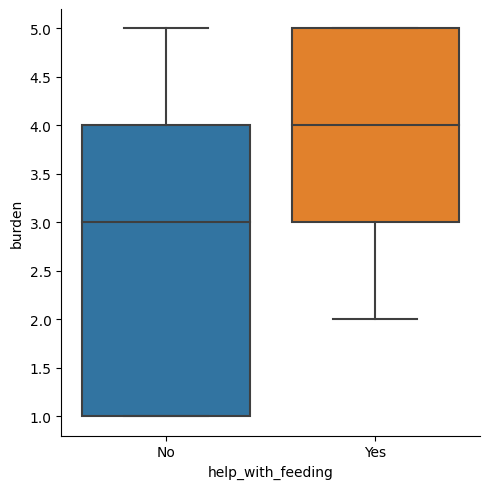

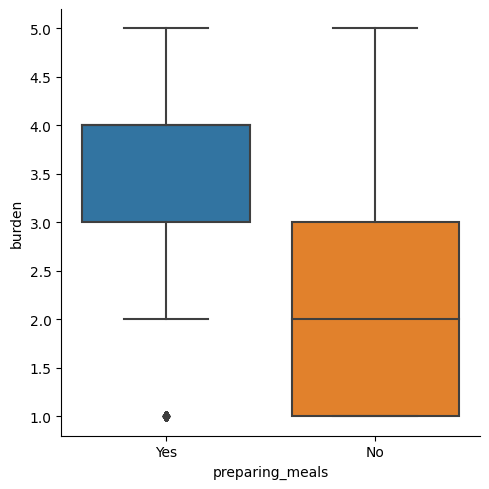

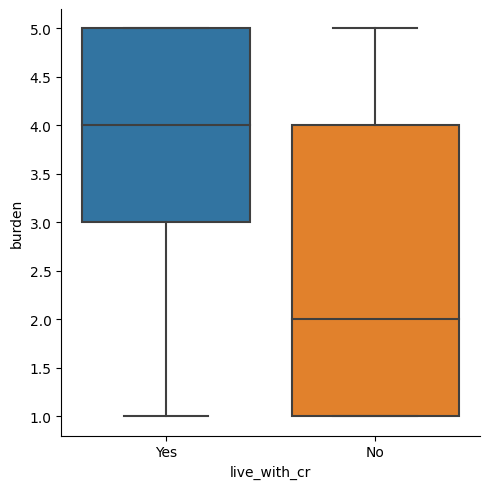

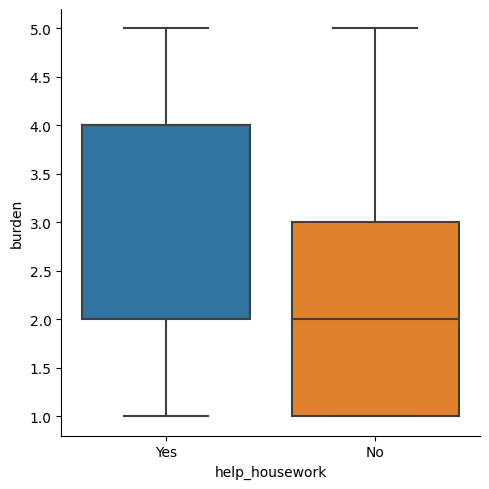

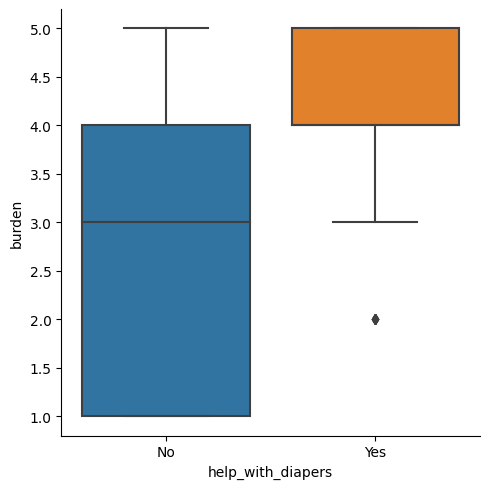

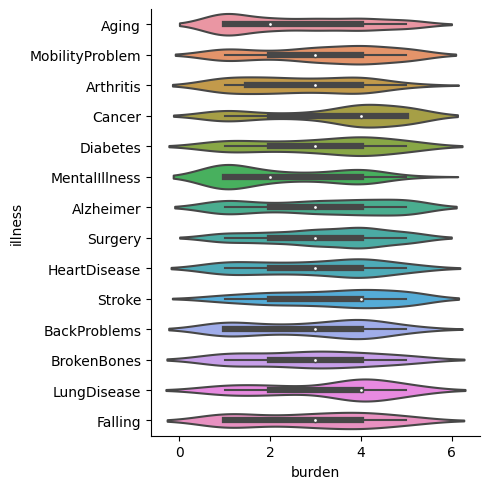

In [29]:
sns.catplot(x="burden", y="hours", kind="box", data=data_burden)

sns.catplot(x="burden", y="iadls", kind="box", data=data_burden)

sns.catplot(x="burden", y="adls", kind="box", data=data_burden)

sns.catplot(x="help_with_bed", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_dressed", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_bathe", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_med", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_toilet", y="burden", kind="box", data=data_burden)

sns.catplot(x="giving_medicine", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_feeding", y="burden", kind="box", data=data_burden)

sns.catplot(x="preparing_meals", y="burden", kind="box", data=data_burden)

sns.catplot(x="live_with_cr", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_housework", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_burden)



sns.catplot(x="burden", y="illness",
            kind="violin", data=data_burden)
